In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('penguins_size.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [5]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [6]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [7]:
df[df['sex']== '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [8]:
df[df['species'] == 'Gentoo'].groupby('sex').describe().T

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [9]:
df.at[336,'sex'] = 'FEMALE'

In [10]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [12]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [13]:
df = df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


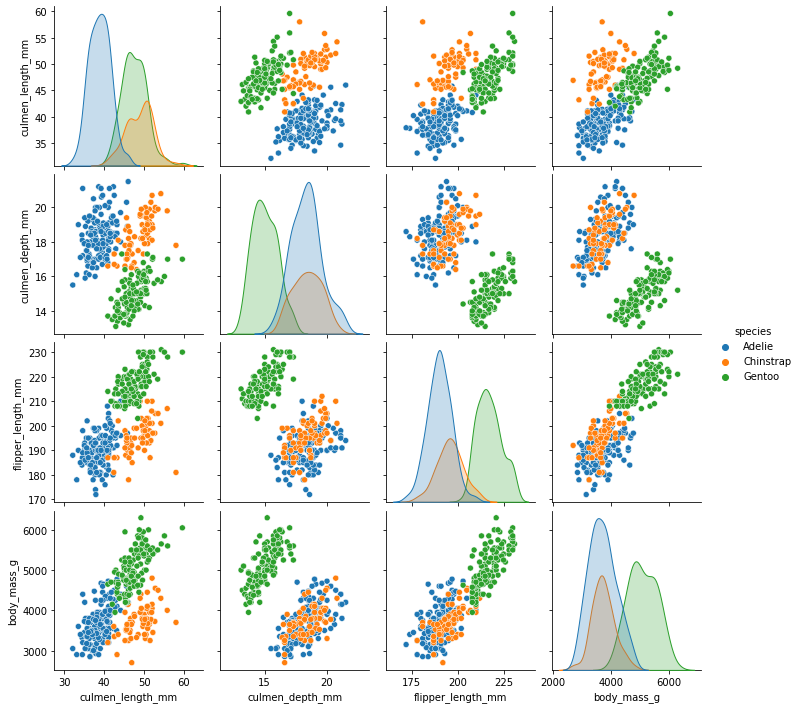

In [15]:
sns.pairplot(df,hue='species')

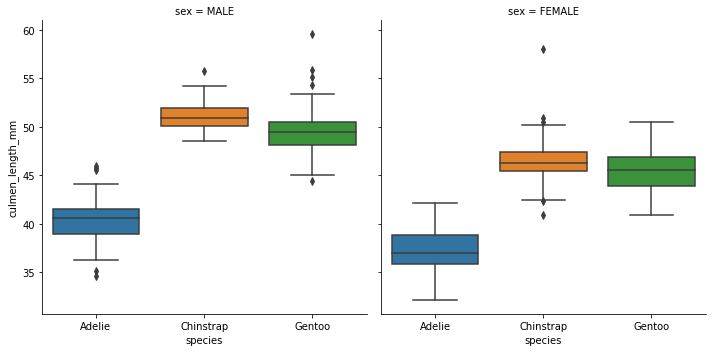

In [16]:
sns.catplot(x='species', y='culmen_length_mm', data=df, kind='box', col='sex')

In [17]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)

In [18]:
y = df['species']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
model = DecisionTreeClassifier()

In [23]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
base_preds = model.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [26]:
print(classification_report(y_test, base_preds))

              precision    recall  f1-score   support

      Adelie       0.93      0.98      0.95        41
   Chinstrap       0.95      0.87      0.91        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.96       101
   macro avg       0.96      0.95      0.95       101
weighted avg       0.96      0.96      0.96       101



C:\Users\WINDOWS\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


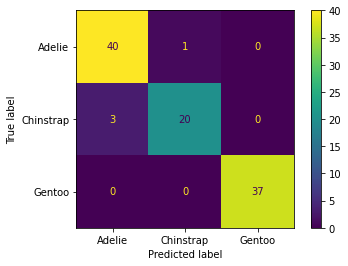

In [27]:
plot_confusion_matrix(model,X_test, y_test)

In [28]:
model.feature_importances_

array([0.32352044, 0.04203954, 0.55368219, 0.00239775, 0.07836008,
       0.        , 0.        ])

In [29]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

In [30]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns= ['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
island_Torgersen,0.000000
sex_MALE,0.000000
body_mass_g,0.002398
culmen_depth_mm,0.042040
island_Dream,0.078360
culmen_length_mm,0.323520
flipper_length_mm,0.553682


In [31]:
from sklearn.tree import plot_tree

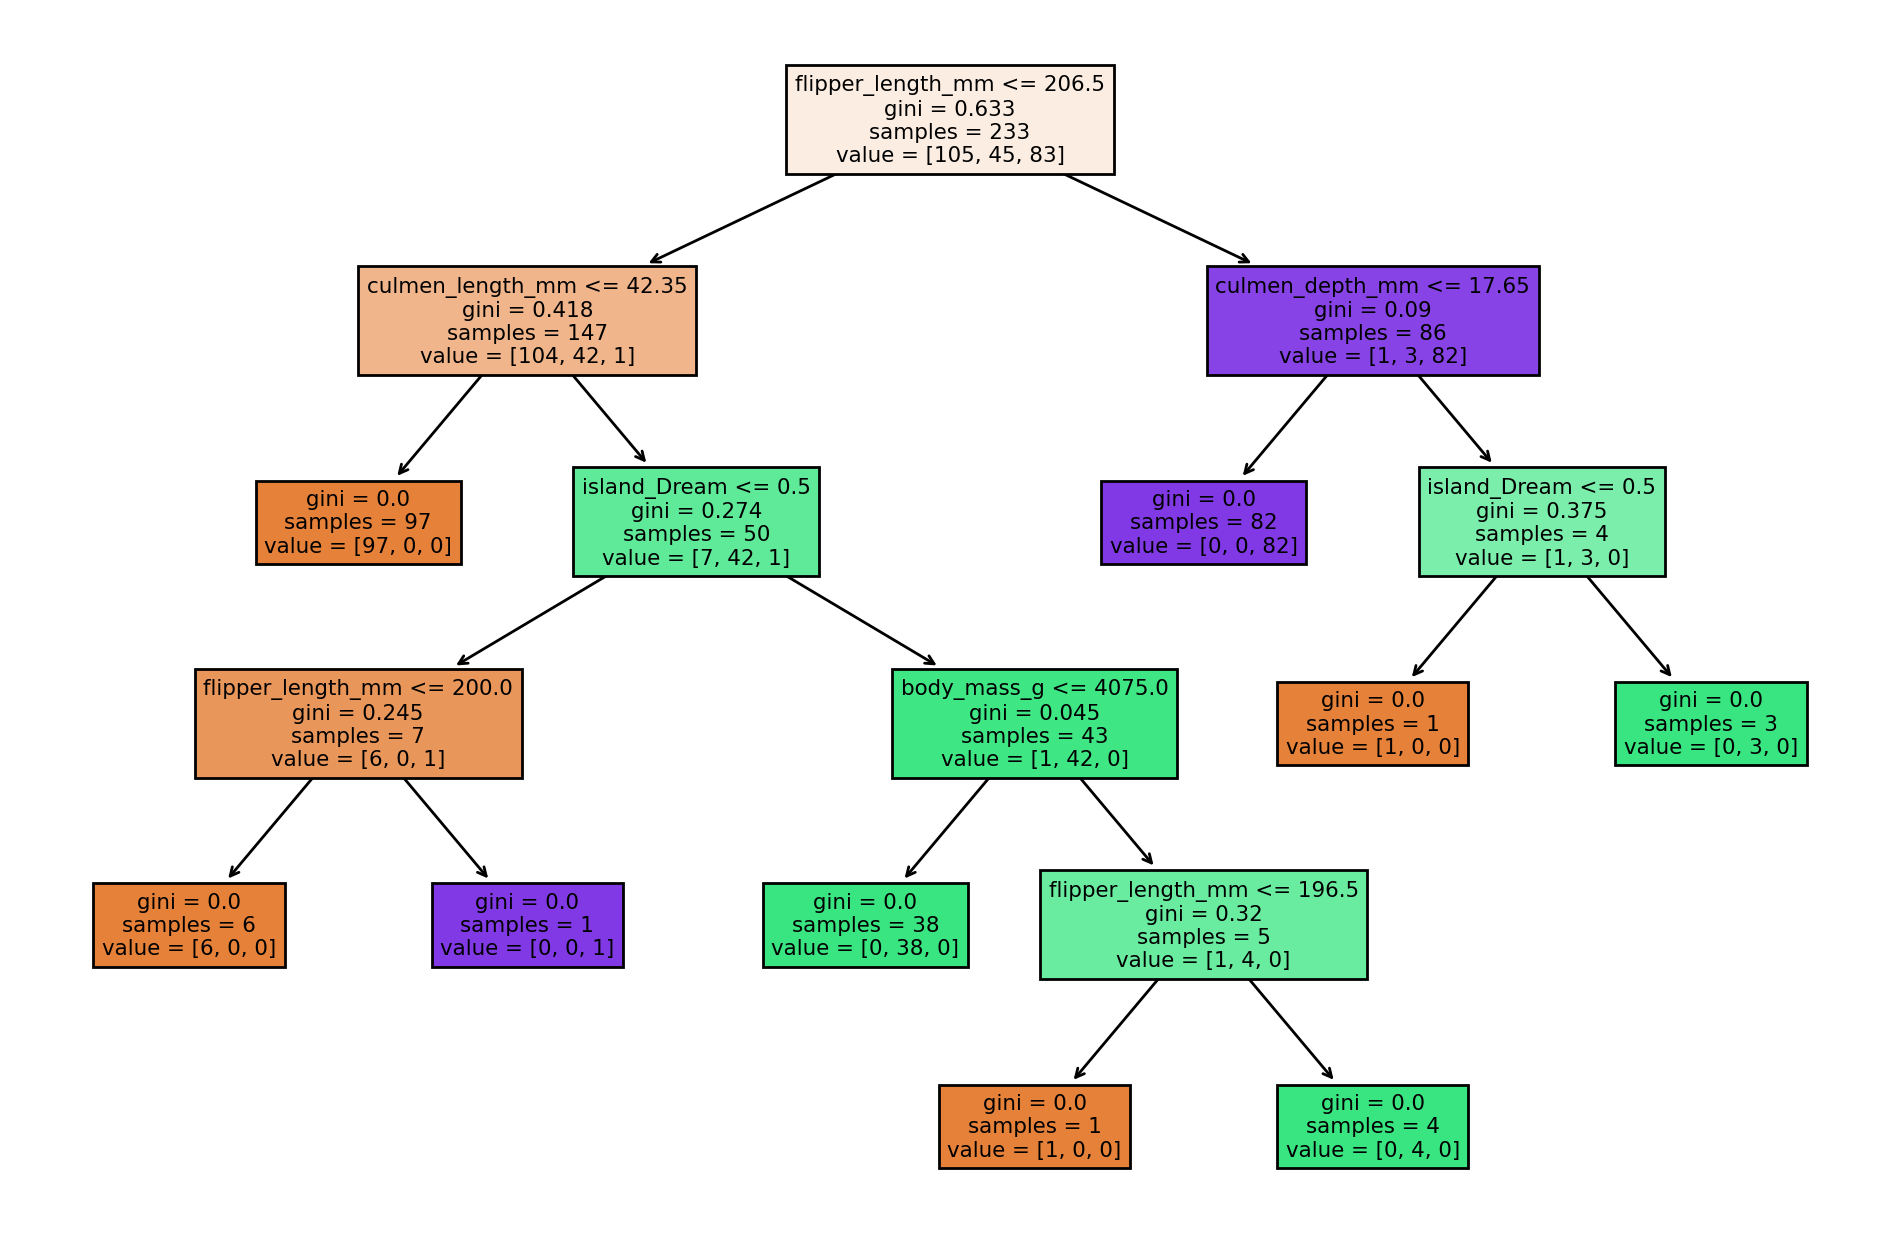

In [32]:
plt.figure(figsize=(12,8),dpi=200)
plot_tree(model,feature_names=X.columns, filled=True);

In [33]:
len(X_train)

233

In [34]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=200)
    plot_tree(model,feature_names=X.columns, filled=True);

              precision    recall  f1-score   support

      Adelie       0.93      0.98      0.95        41
   Chinstrap       0.95      0.87      0.91        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.96       101
   macro avg       0.96      0.95      0.95       101
weighted avg       0.96      0.96      0.96       101





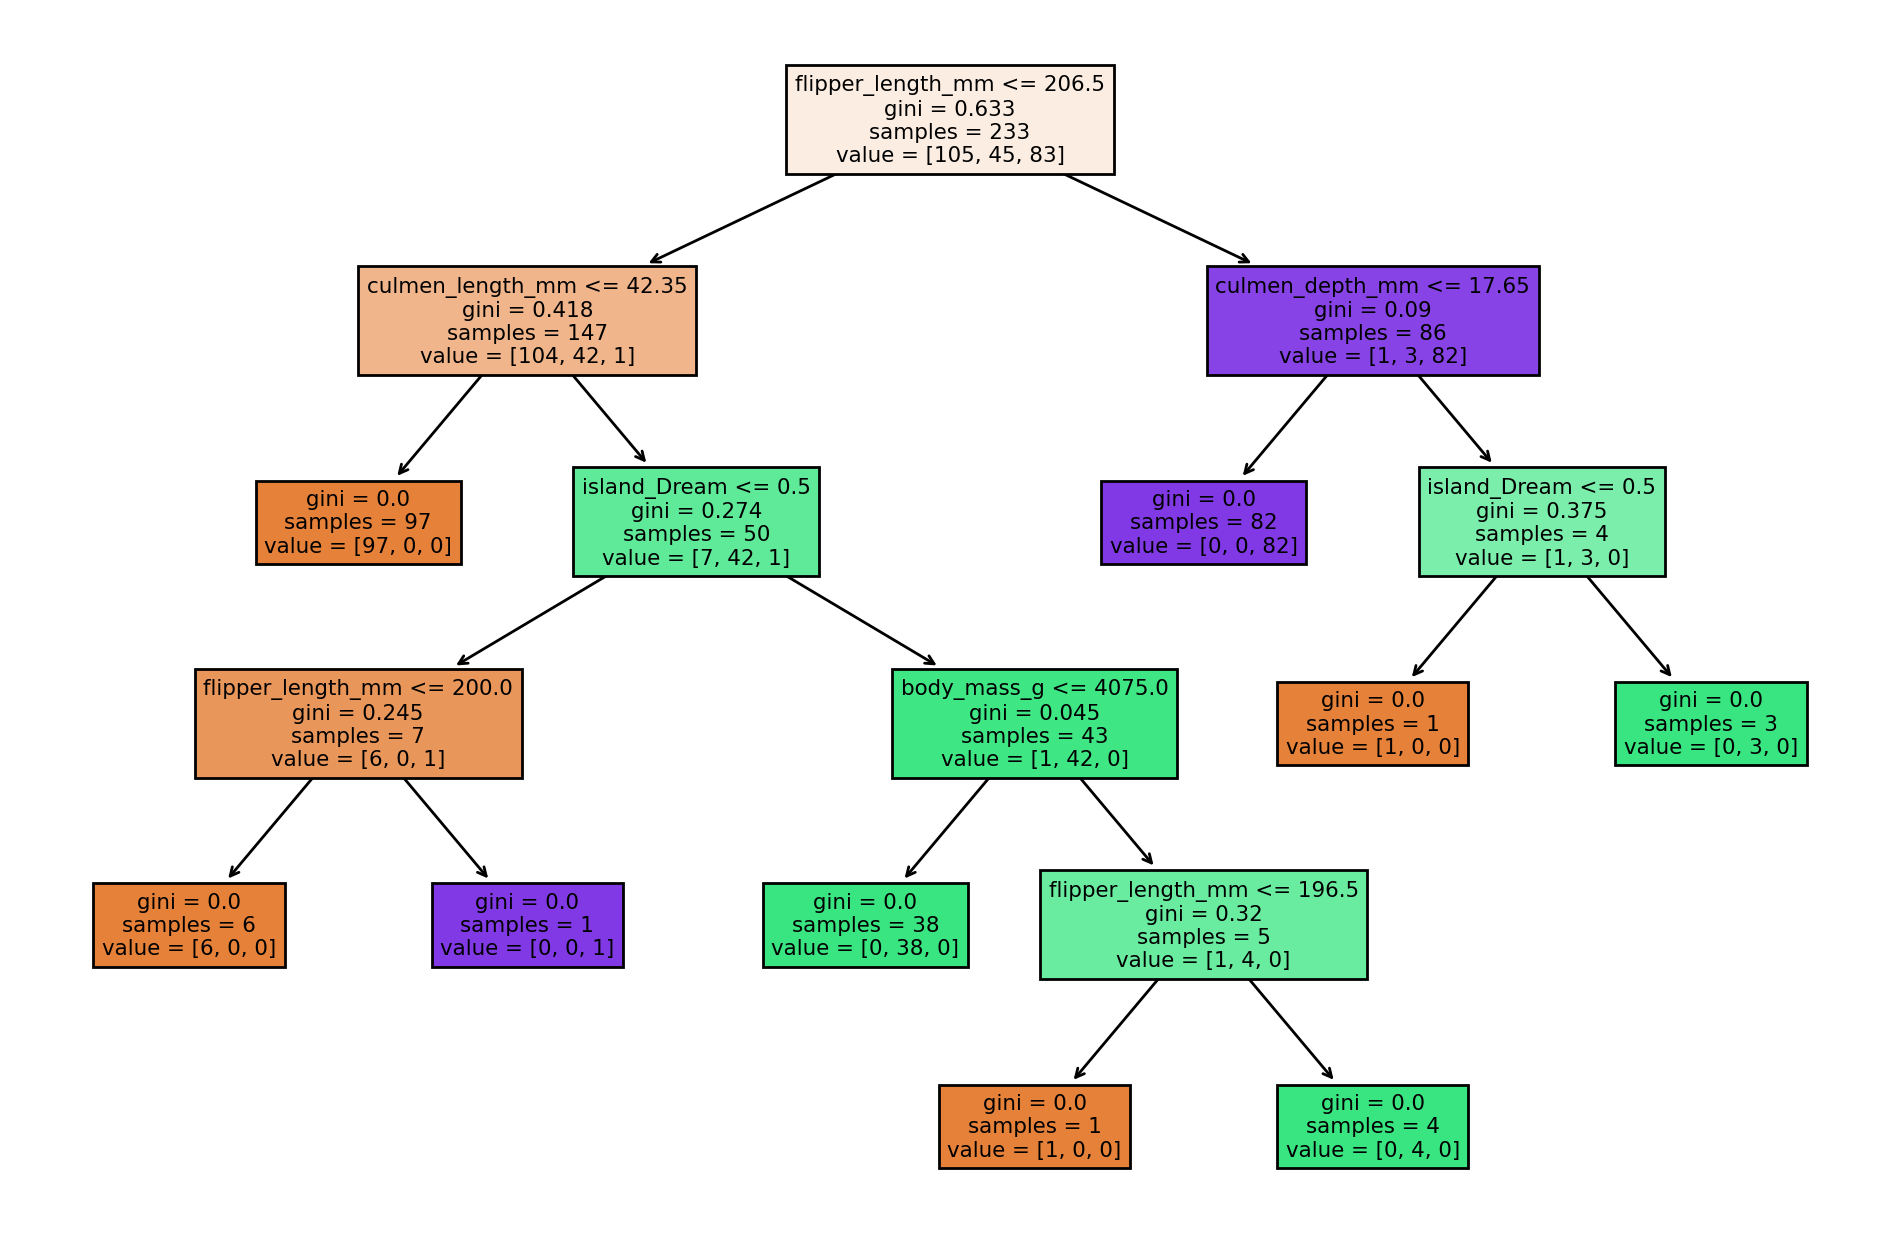

In [35]:
report_model(model)

### Hyperparameters

In [36]:
pruned_tree = DecisionTreeClassifier(max_depth=3)

In [37]:
pruned_tree.fit (X_train,y_train)

DecisionTreeClassifier(max_depth=3)

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101





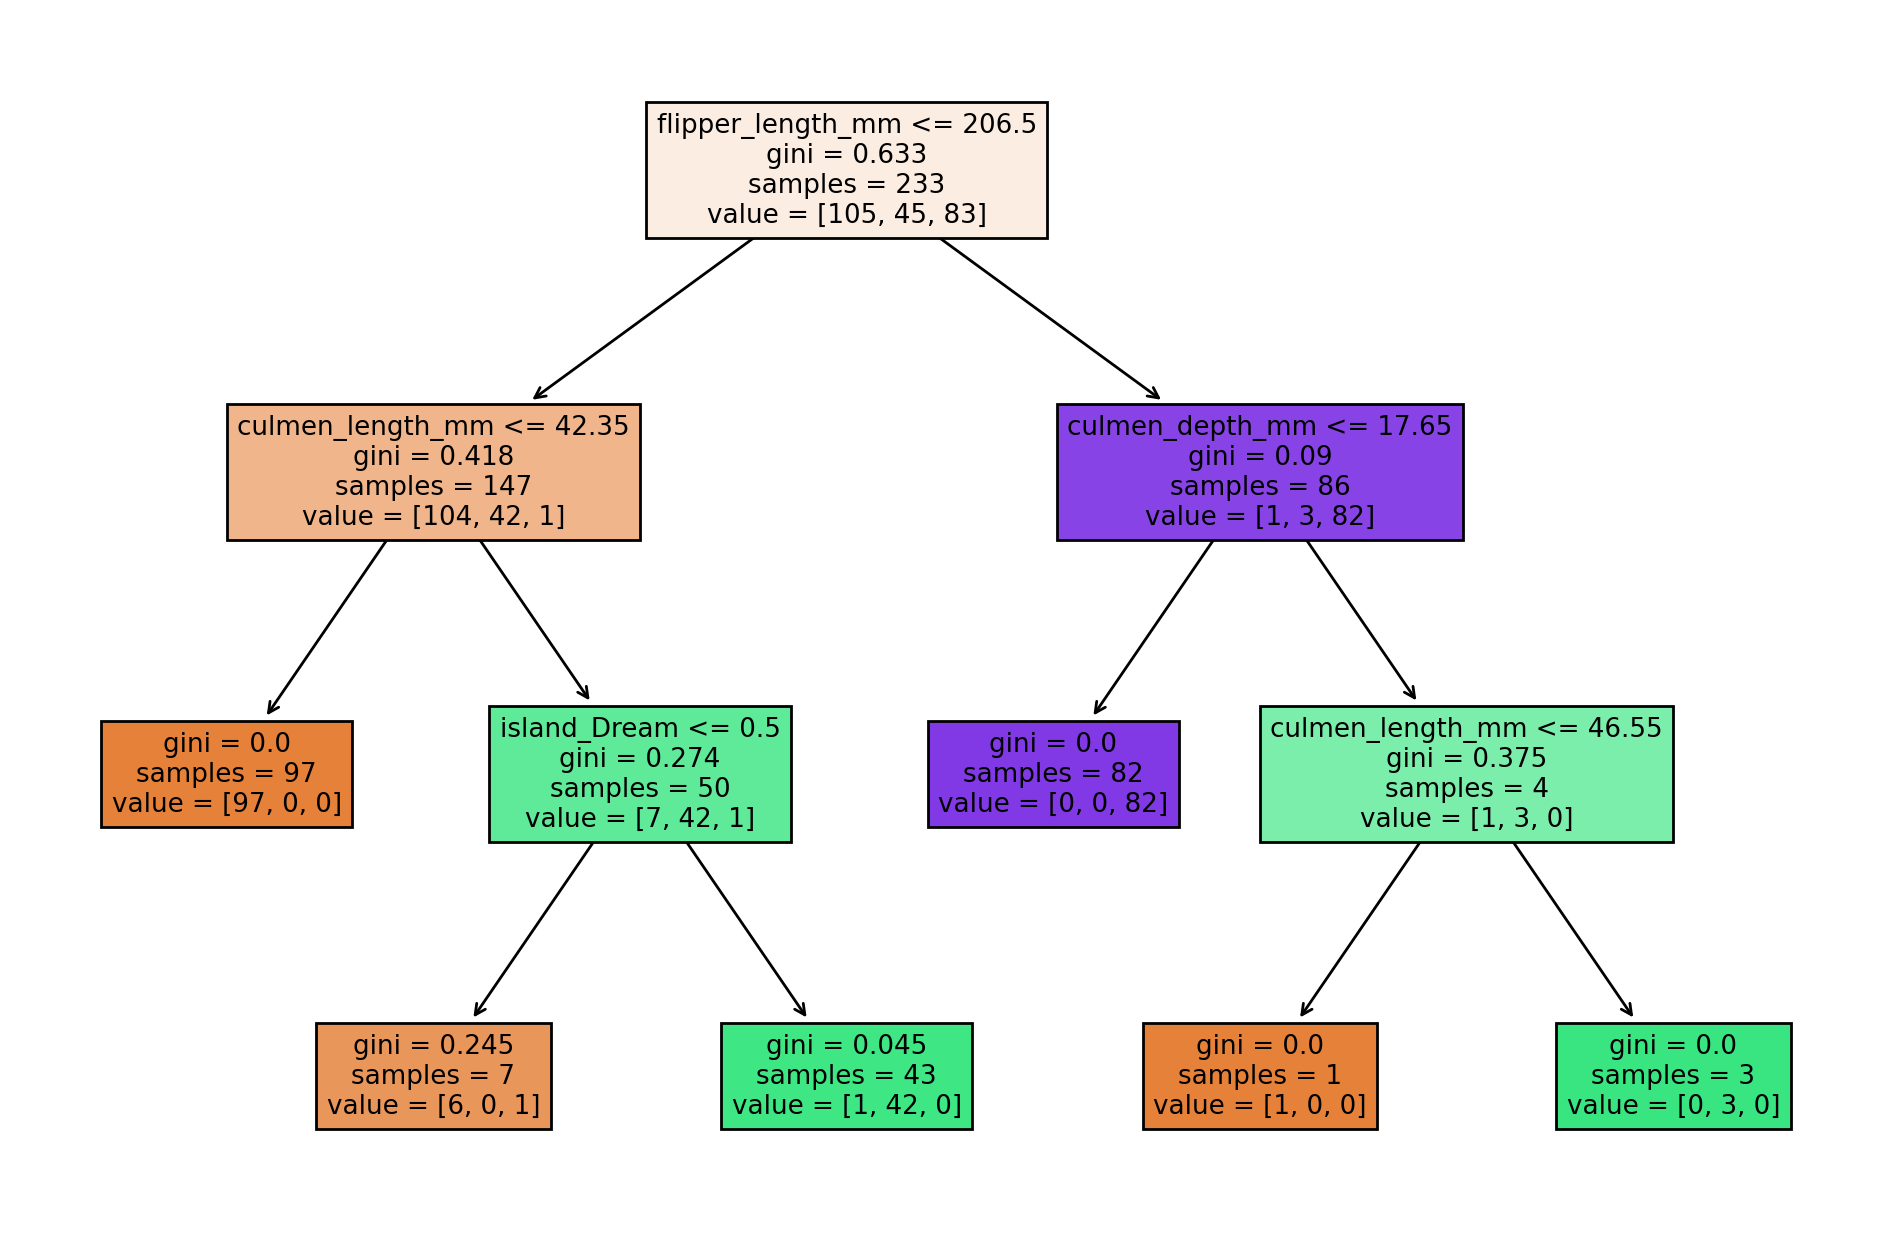

In [38]:
report_model(pruned_tree)

In [39]:
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes=3)

In [40]:
max_leaf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.83      0.87      0.85        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.92       101
   macro avg       0.91      0.92      0.91       101
weighted avg       0.92      0.92      0.92       101





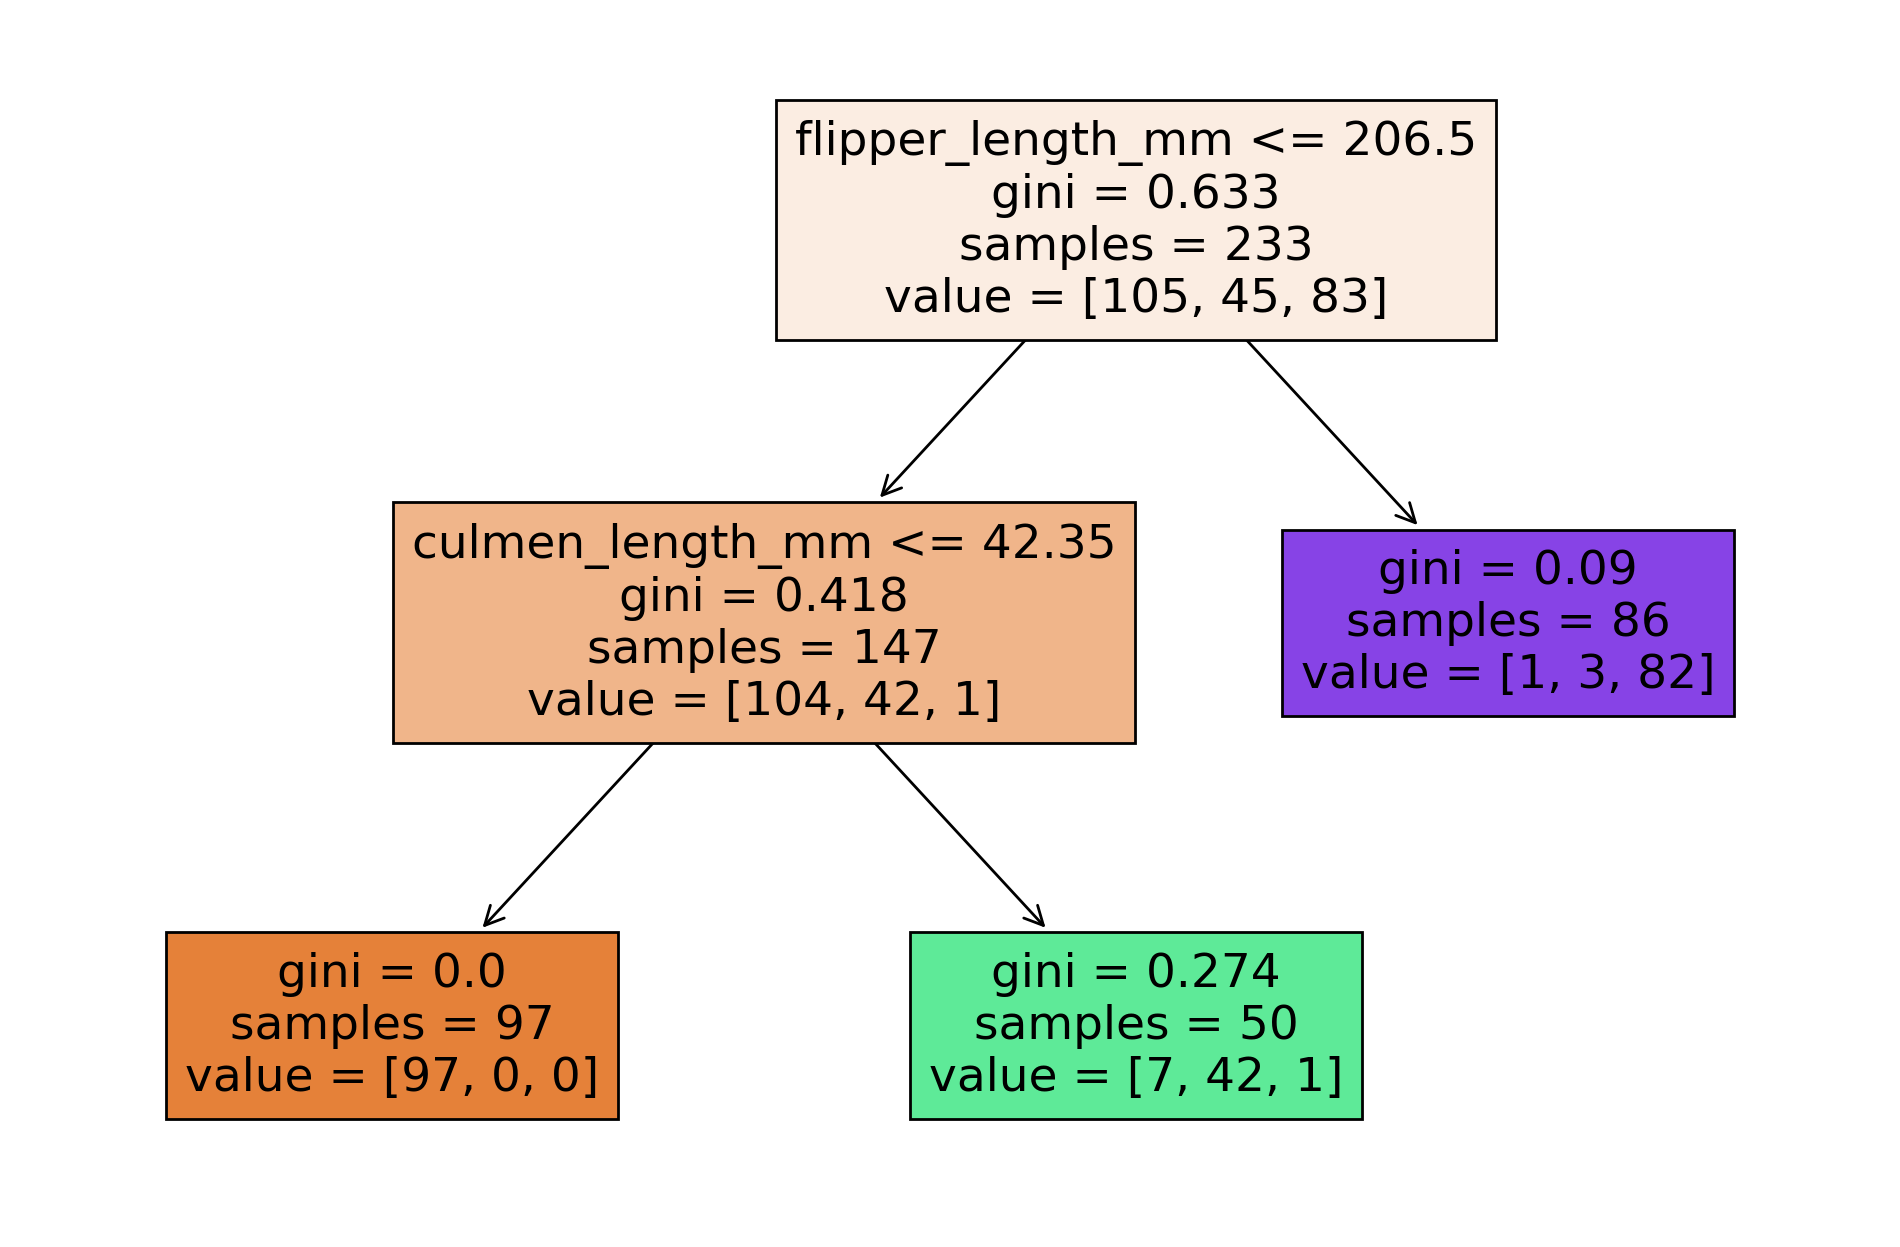

In [41]:
report_model(max_leaf_tree)

In [42]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')

In [43]:
entropy_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101





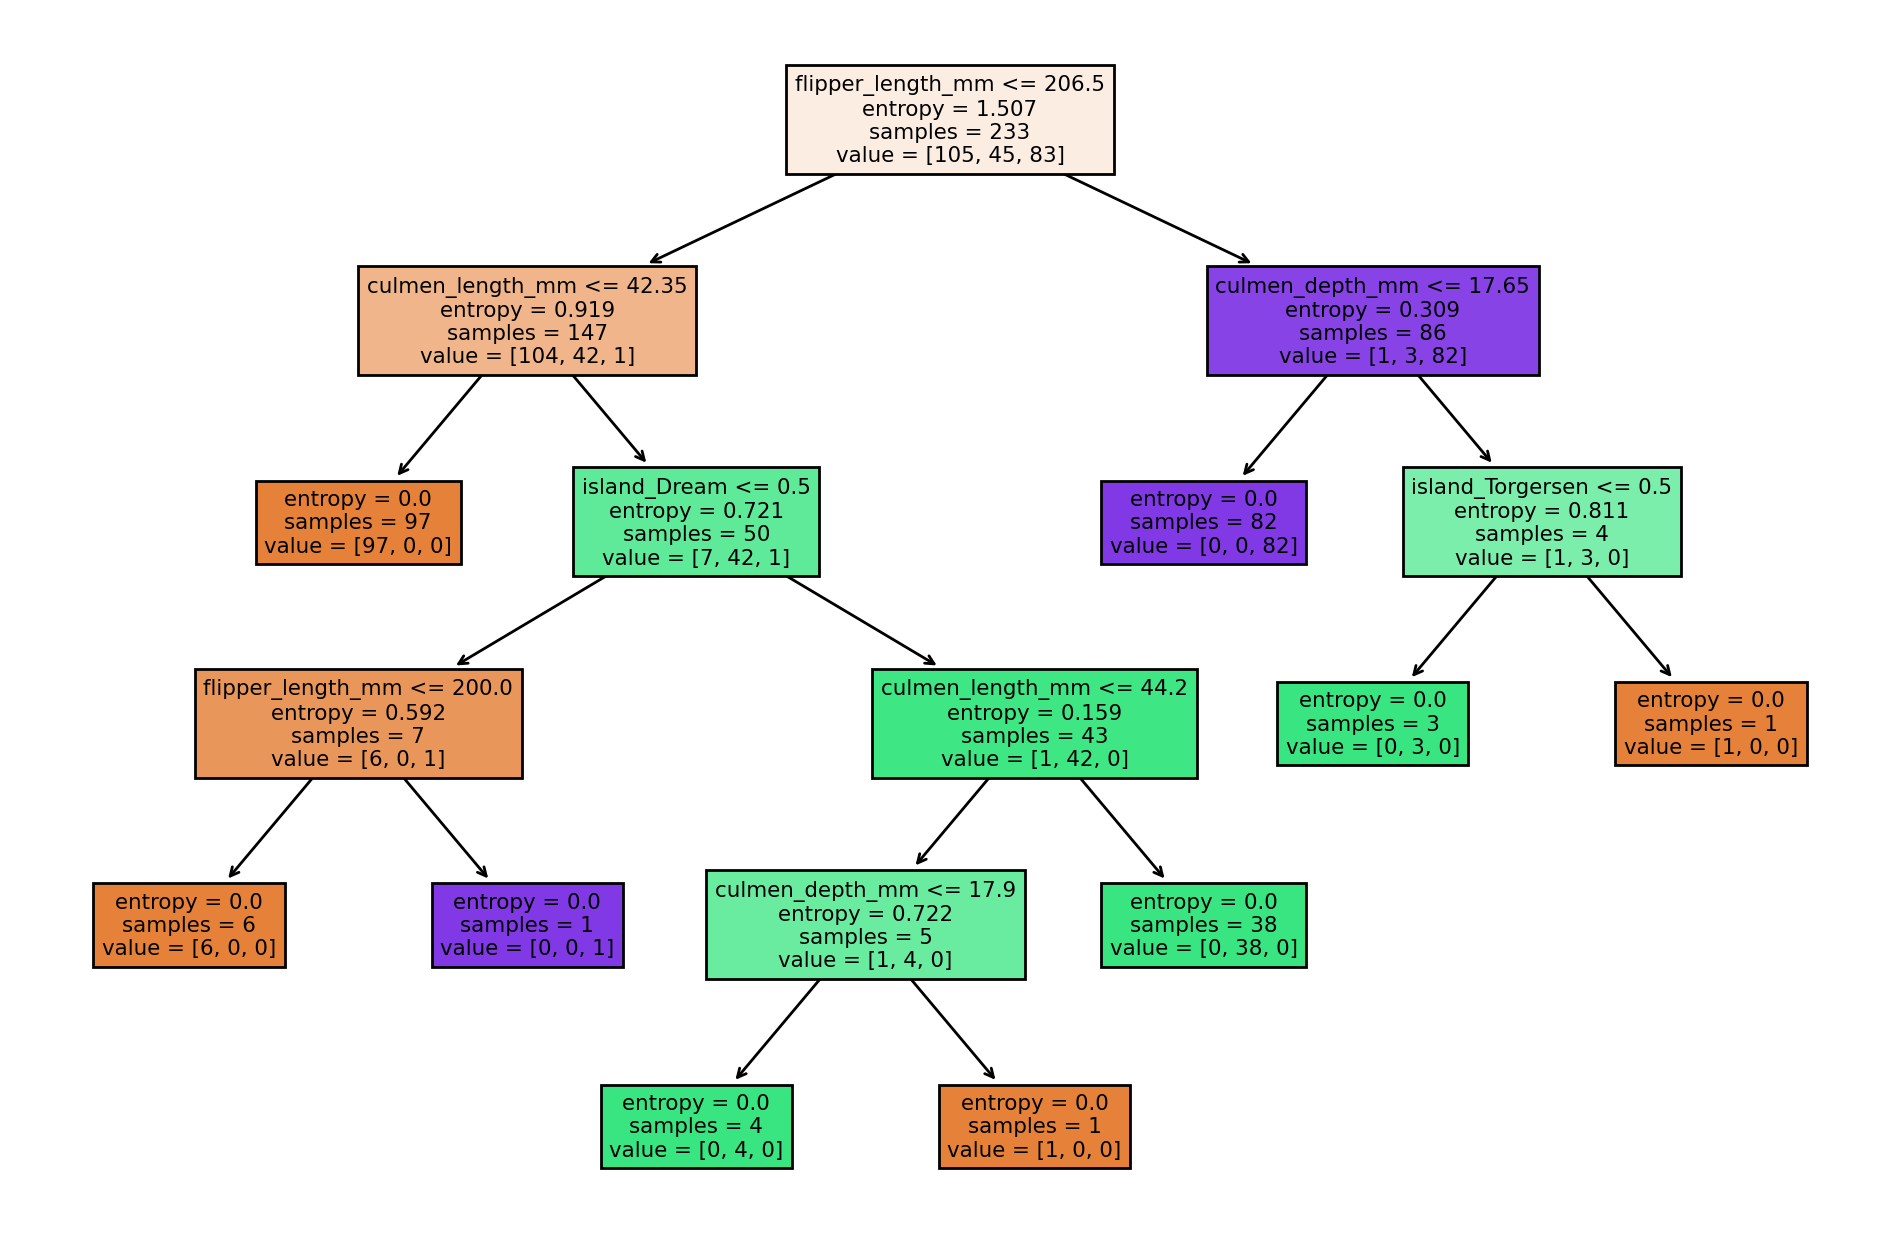

In [44]:
report_model(entropy_tree)

In [45]:
from sklearn.model_selection import GridSearchCV

In [ ]:
DecisionTreeClassifier()

In [68]:
parameters = {"criterion":['gini','entropy'],
              "max_depth": range(1,20,2),
              "min_samples_leaf":range(1,20,2)
             }
grid_forest = GridSearchCV(estimator=model,
                      param_grid= parameters,
                      cv=3,return_train_score=True,
                      n_jobs= -1
                        )

In [69]:
grid_forest.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20, 2),
                         'min_samples_leaf': range(1, 20, 2)},
             return_train_score=True)

In [73]:
df = pd.DataFrame(grid_forest.cv_results_)

<AxesSubplot:xlabel='param_min_samples_leaf', ylabel='param_max_depth'>

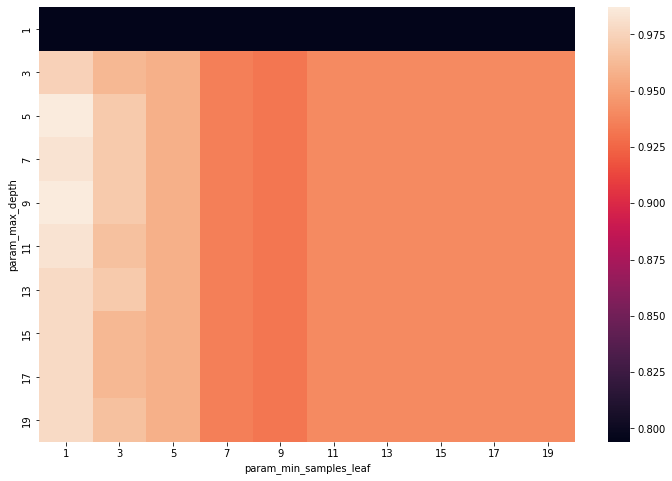

In [81]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df[df['param_criterion'] == 'gini'].pivot_table(index='param_max_depth',columns= 'param_min_samples_leaf', values='mean_test_score'))

In [77]:
df[df['param_criterion'] == 'gini'].pivot_table(index='param_max_depth',columns= 'param_min_samples_leaf', values='mean_test_score')

param_min_samples_leaf,1,3,5,7,9,11,13,15,17,19
param_max_depth,,,,,,,,,,
1,0.793984,0.793984,0.793984,0.793984,0.793984,0.793984,0.793984,0.793984,0.793984,0.793984
3,0.974303,0.961483,0.957098,0.935620,0.931346,0.939893,0.939893,0.939893,0.939893,0.939893
5,0.987179,0.970030,0.957098,0.935620,0.931346,0.939893,0.939893,0.939893,0.939893,0.939893
7,0.982795,0.970030,0.957098,0.935620,0.931346,0.939893,0.939893,0.939893,0.939893,0.939893
9,0.987179,0.970030,0.957098,0.935620,0.931346,0.939893,0.939893,0.939893,0.939893,0.939893
11,0.982906,0.965756,0.957098,0.935620,0.931346,0.939893,0.939893,0.939893,0.939893,0.939893
13,0.978521,0.970030,0.957098,0.935620,0.931346,0.939893,0.939893,0.939893,0.939893,0.939893
15,0.978466,0.961483,0.957098,0.935620,0.931346,0.939893,0.939893,0.939893,0.939893,0.939893
17,0.978521,0.961483,0.957098,0.935620,0.931346,0.939893,0.939893,0.939893,0.939893,0.939893


In [71]:
grid_forest.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1}

In [65]:
grid_forest.best_score_

0.9829787234042554

In [82]:
parameters = {"max_depth": range(1,31)}

grid = GridSearchCV(estimator=model,
                      param_grid= parameters,
                      cv=3,return_train_score=True,
                      n_jobs= -1
                        )

In [83]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 31)}, return_train_score=True)

In [84]:
grid.best_params_

{'max_depth': 5}

In [85]:
df = pd.DataFrame(grid.cv_results_)

<AxesSubplot:xlabel='param_max_depth'>

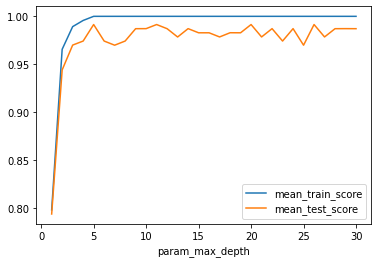

In [88]:
df.set_index('param_max_depth')[['mean_train_score', 'mean_test_score']].plot()